# Linear Regression using Stochastic Gradient Descent(SGD) on Boston House Prices

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.linear_model import SGDRegressor
from matplotlib.pyplot import scatter

In [2]:
boston_data = load_boston()

In [3]:
X = boston_data.data

In [4]:
X.shape

(506, 13)

Observation: There are 506 Data points with 13 Features

In [5]:
y = boston_data.target
len(y)

506

In [6]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Standardization

In [7]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

## Custom Linear Regression using Gradient Descent 

In [8]:
def linearRegressionGD(X,y,w = np.zeros(13),b = 0,iterations=5000,learning_rate=0.1,epsilon_val=0.004):
    """
        Linear Regression Using Gradient Descent Optimization

        Parameters
        ----------
        X : numpy array or sparse matrix of shape [n_samples,n_features]
            Training data

        y : numpy array of shape [n_samples, n_targets]
            Target values

        w:  Weight Vector first initializad with 0's
        
        
        b:  y-intercept
        
        
        iterations: no.of iterations
        
        epsilon_val: Termination Criteria

        Returns
        -------
        w,b,cost or MSE
        """
    start = datetime.now()
    n = float(len(y))
    costs = [];
    decay_rate = 0.0001
    eta=learning_rate
    for i in range(iterations):
        
        #learning rate 
        eta = eta * (1.0/(1+decay_rate*i))
        error = y -  predict(X,w,b) #y_act - y_actual
        
        #partial differentiation w.r.t w
        w_grad = (-2.0/n)*(X.T.dot(error))
        
        #partial differentiation w.r.t b
        b_grad = (-2.0/n)*(np.sum(error))
        
        #MSE
        cost = (1.0/n)*np.sum(np.power(error,2))
        
        #updating weight vector
        w = w - (eta*w_grad)
        
        #updating y-intercept
        b = b - (eta*b_grad)
        
        costs.append(cost)
        
        #Stopping Criteria
        if i==0:
            w_prev = w;
        else:
            dist = (np.linalg.norm(w-w_prev))
            w_prev = w
            
            #Terminates the loop when difference between w and w_prev is very less 
            if(round(dist,6)<epsilon_val):
                print("no.of iterations: ",i,"Cost: ",min(costs))
                break;
        
    print("Time: Taken: ",datetime.now() - start)
    return w,b,cost;



def predict(x,m,c):
    """
        It predicts the target value based on the input parameter values
        
        Parameters
        ----------
        x : numpy array or sparse matrix of shape [n_samples,n_features]
            Training data
        
        
    """
    y = np.dot(x,m) + c
    return y


def score(X,y,m,c):
    
    """
    It gives the Score or accuracy
    
    Parameters
        ----------
        X : numpy array or sparse matrix of shape [n_samples,n_features]
            Training data
            
        y : numpy array of shape [n_samples, n_targets]
            Target values
            
        m : slope
        
        c : y-intercept  
    """
    
    from sklearn.metrics import r2_score
    return r2_score(y,predict(X,m,c).flatten())

In [20]:
w1,b1,cost1 = linearRegressionGD(x_train,y_train)

no.of iterations:  131 Cost:  20.9300479465
Time: Taken:  0:00:00.011941


In [21]:
score(x_test,y_test,w1,b1)

0.7368587800798797

## Custom Linear Regression using SGD

In [9]:
def linearRegressionSGD(X,y,w = np.zeros(13),b = 0,iterations=1000,case_size=100,learning_rate=0.1,epsilon_val=0.004):
    """
        Linear Regression Using Gradient Descent Optimization

        Parameters
        ----------
        X : numpy array or sparse matrix of shape [n_samples,n_features]
            Training data

        y : numpy array of shape [n_samples, n_targets]
            Target values

        w:  Weight Vector first initializad with 0's
        
        
        b:  y-intercept
        
        
        iterations: no.of iterations
        
        
        case_size : bunch of points to be taken in each iteration 
        
        
        epsilon_val: Termination Criteria


        Returns
        -------
        w,b,cost or MSE
        """
    start = datetime.now()
    n = float(len(y))
    costs = [];
    decay_rate = 0.0001
    eta=learning_rate
    
    
    for iters in range(iterations):
        eta = eta * (1.0/(1+decay_rate*iters))
        
        X,y =  shuffle(X,y,random_state=0,replace=True)
    
    
        for i in range(case_size):
            x_mini = X[i:i+case_size]
            y_mini = y[i:i+case_size]
            
            
            error = y_mini -  predict(x_mini,w,b) #y_act - y_predicted

            #partial differentiation w.r.t w
            w_grad = (-2.0/n)*(x_mini.T.dot(error))

            #partial differentiation w.r.t b
            b_grad = (-2.0/n)*(np.sum(error))

            #MSE
            cost = (1.0/n)*np.sum(np.power(error,2))

            #updating weight vector
            w = w - (eta*w_grad)

            #updating y-intercept
            b = b - (eta*b_grad)

            costs.append(cost)

            
        #Stopping Criteria
        if iters==0:
            w_prev = w;
        else:
            dist = (np.linalg.norm(w-w_prev))
            w_prev = w
            
            #Terminates the loop when difference between w and w_prev is very less 
            if(round(dist,6)<epsilon_val):
                print("no.of iterations: ",iters,"Cost: ",min(costs))
                break;
        
    print("Time Taken: ",datetime.now() - start)
    return w,b,cost;

In [57]:
w,b,cost = linearRegressionSGD(x_train,y_train)

no.of iterations:  379 Cost:  2.3610421482
Time Taken:  0:00:00.901566


In [58]:
# final Weight Vector
w

array([-0.44528049,  1.18336573, -0.00825891,  0.71232241, -2.15167063,
        2.69403028, -0.35533995, -3.51291847,  2.14806818, -1.61030112,
       -2.13751993,  0.96277588, -3.32768966])

In [59]:
# Final y-intercept
b

22.598247491871987

In [60]:
cost

6.0160838332641928

In [61]:
score(x_test,y_test,w,b)

0.7428985195078156

## Sklearn SGD Regressor

In [54]:
sgd_lr = SGDRegressor(eta0=0.1,shuffle=True)

sgd_lr.fit(x_train,y_train)

y_pred = sgd_lr.predict(x_test)

r2_score(y_test,y_pred)

0.7236731566748813

In [55]:
sgd_lr.coef_

array([-0.51154757,  1.16277626,  0.45075066,  0.54998761, -2.0917407 ,
        2.51920819, -0.59341105, -3.59284535,  1.99623011, -1.07285643,
       -2.19643933,  1.53888722, -3.21550559])

## Scatter Plots of Actual Vs Predictions of Sklearn and Custom Impls

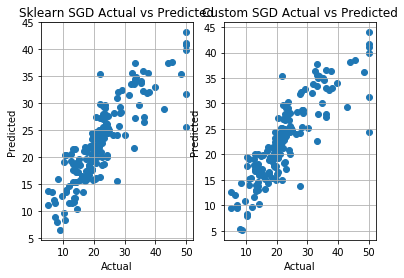

In [91]:
plt.subplot(121)
plt.scatter(x=y_test, y=y_pred);
plt.title('Sklearn SGD Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.subplot(122)
plt.scatter(x=y_test, y=predict(x_test,w,b).flatten());
plt.title('Custom SGD Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.show()

## Weight Vectors Comparision

In [64]:
print("Custom GD Linear Regression Weight Vector:  ",w1)
print("Custom SGD Linear Regression Weight Vector:  ",w)
print("SkLearn SGD Linear Regression Weight Vector:  ",sgd_lr.coef_)

Custom GD Linear Regression Weight Vector:   [-0.31488545  1.01598113 -0.04944872  0.77237078 -1.93660554  2.99868062
 -0.49479217 -3.30437067  1.55003278 -1.20937898 -2.08453311  0.99504223
 -3.0701105 ]
Custom SGD Linear Regression Weight Vector:   [-0.44528049  1.18336573 -0.00825891  0.71232241 -2.15167063  2.69403028
 -0.35533995 -3.51291847  2.14806818 -1.61030112 -2.13751993  0.96277588
 -3.32768966]
SkLearn SGD Linear Regression Weight Vector:   [-0.51154757  1.16277626  0.45075066  0.54998761 -2.0917407   2.51920819
 -0.59341105 -3.59284535  1.99623011 -1.07285643 -2.19643933  1.53888722
 -3.21550559]


## Scores Custom vs Sklearn Implementation

In [63]:
print("Custom GD Linear Regression Score: ",score(x_test,y_test,w1,b1))
print("Custom SGD Linear Regression Score: ",score(x_test,y_test,w,b))
print("SkLearn SGD Linear Regression Score: ",r2_score(y_test,y_pred))

Custom GD Linear Regression Score:  0.73685878008
Custom SGD Linear Regression Score:  0.742898519508
SkLearn SGD Linear Regression Score:  0.723673156675


> Accuracy is almost similar, Custome Sgd Implementation got highest score here, but Scores may change slightly based on the shuffle.